In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
protein_concentrations = [8,40,200,1000]
path = '/datadisk/MIME/exp/expData/parsed_data/round2/'

In [3]:
# initialize bound and unbount count dictionaries
bound_counts = {}
unbound_counts = {}
sequences = {}

In [4]:
# read in all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        bound_counts[(c1,c2)] = np.loadtxt(path + f'encoded_pool_{c1}_{c2}/encoded_pool/bound_counts.txt')
        unbound_counts[(c1,c2)] = np.loadtxt(path + f'encoded_pool_{c1}_{c2}/encoded_pool/unbound_counts.txt')
        sequences[(c1,c2)] = np.loadtxt(path + f'encoded_pool_{c1}_{c2}/encoded_pool/unique_sequences.txt', dtype=str)
   

In [5]:
# filter all counts to only include values that are not zero
# bound_counts = {k: v[v > 0] for k, v in bound_counts.items()}
# unbound_counts = {k: v[v > 0] for k, v in unbound_counts.items()}

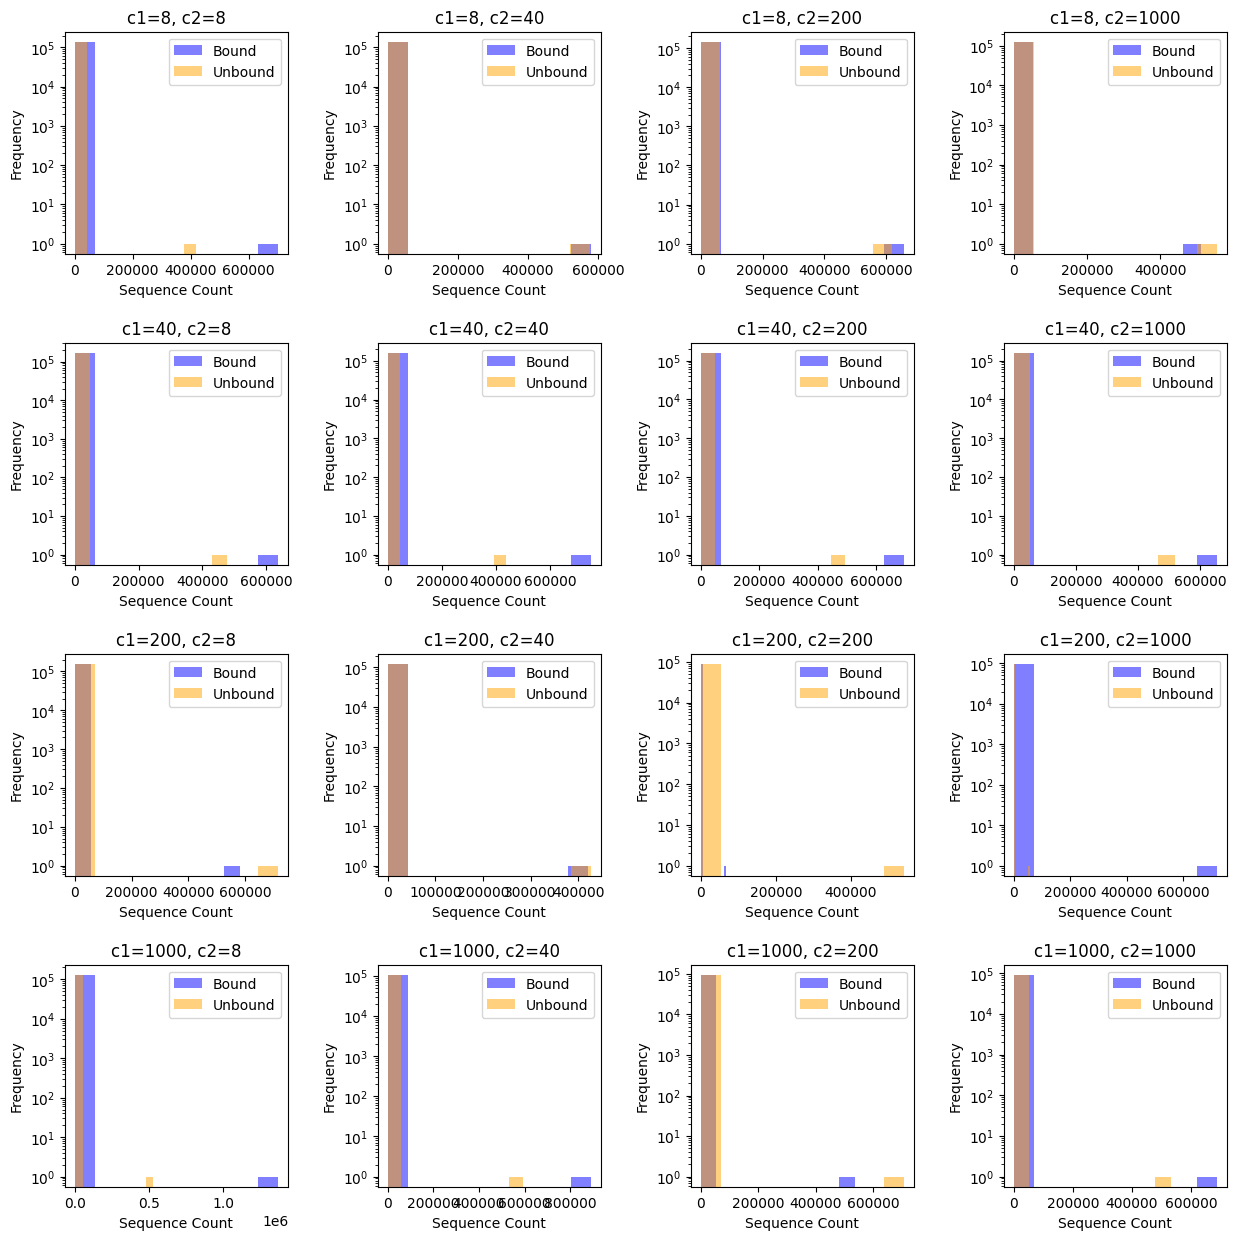

In [6]:
# setup 4 by 4 grid
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# loop through all concentrations
for i, c1 in enumerate(protein_concentrations):
    for j, c2 in enumerate(protein_concentrations):
        # plot histogram of bound and unbound counts
        axs[i, j].hist(bound_counts[(c1,c2)], alpha=0.5, label='Bound', color='blue')
        axs[i, j].hist(unbound_counts[(c1,c2)], alpha=0.5, label='Unbound', color='orange')
        axs[i, j].set_title(f'c1={c1}, c2={c2}')
        axs[i, j].set_xlabel('Sequence Count')
        axs[i, j].set_ylabel('Frequency')
        # log scale the y-axis
        axs[i, j].set_yscale('log')
        axs[i, j].legend()
        
plt.show()

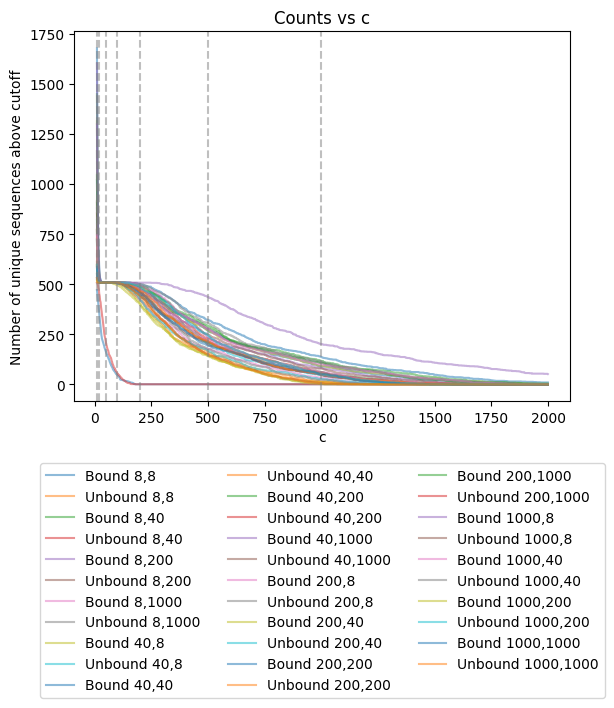

In [7]:
# for each pool plot number of counts > threshold vs theshold
thresholds = np.arange(10, 2000, 1)
bound_counts_above_threshold = {}
unbound_counts_above_threshold = {}
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # get the bound and unbound counts
        bound_counts_above_threshold[(c1,c2)] = np.array([np.sum(bound_counts[(c1,c2)] > t) for t in thresholds])
        unbound_counts_above_threshold[(c1,c2)] = np.array([np.sum(unbound_counts[(c1,c2)] > t) for t in thresholds])
        # plot the number of counts above threshold
        plt.plot(thresholds, bound_counts_above_threshold[(c1,c2)], label=f'Bound {c1},{c2}', alpha=0.5)
        plt.plot(thresholds, unbound_counts_above_threshold[(c1,c2)], label=f'Unbound {c1},{c2}', alpha=0.5)

# vertical lines at 10, 20, 50, 100, 200, 500, 1000
for t in [10, 20, 50, 100, 200, 500, 1000]:
    plt.axvline(x=t, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('c')
plt.ylabel('Number of unique sequences above cutoff')
plt.title('Counts vs c')
# plot legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

In [8]:
# 200,200 and 200,1000 have weird counts!

In [12]:
# get number of unique sequences with 2 or more mutations (non zero states)
high_mutant_seqs_bound = {}
high_mutant_seqs_unbound = {}
# sequences are strings of states that are either '0' for wildtype or '1', '2', '3' for mutant states
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # get the sequences
        seqs = list(sequences[(c1,c2)])
        # get the bound and unbound counts
        bound_counts_ = bound_counts[(c1,c2)]
        unbound_counts_ = unbound_counts[(c1,c2)]
        # get the indices of the sequences with 2 or more mutations
        bound_indices = []
        unbound_indices = []
        for seq in seqs:
            # count the number of mutations in the sequence
            seq = list(seq)
            num_mutations = np.sum(np.array(seq) != '0')
            # if there are 2 or more mutations, add the index to the list
            if num_mutations >= 2:
                bound_indices.append(True)
                unbound_indices.append(True)
            else:
                bound_indices.append(False)
                unbound_indices.append(False)

        # add the counts of these sequences to the bound and unbound counts
        high_mutant_seqs_bound[(c1,c2)] = bound_counts_[bound_indices]
        high_mutant_seqs_unbound[(c1,c2)] = unbound_counts_[unbound_indices]

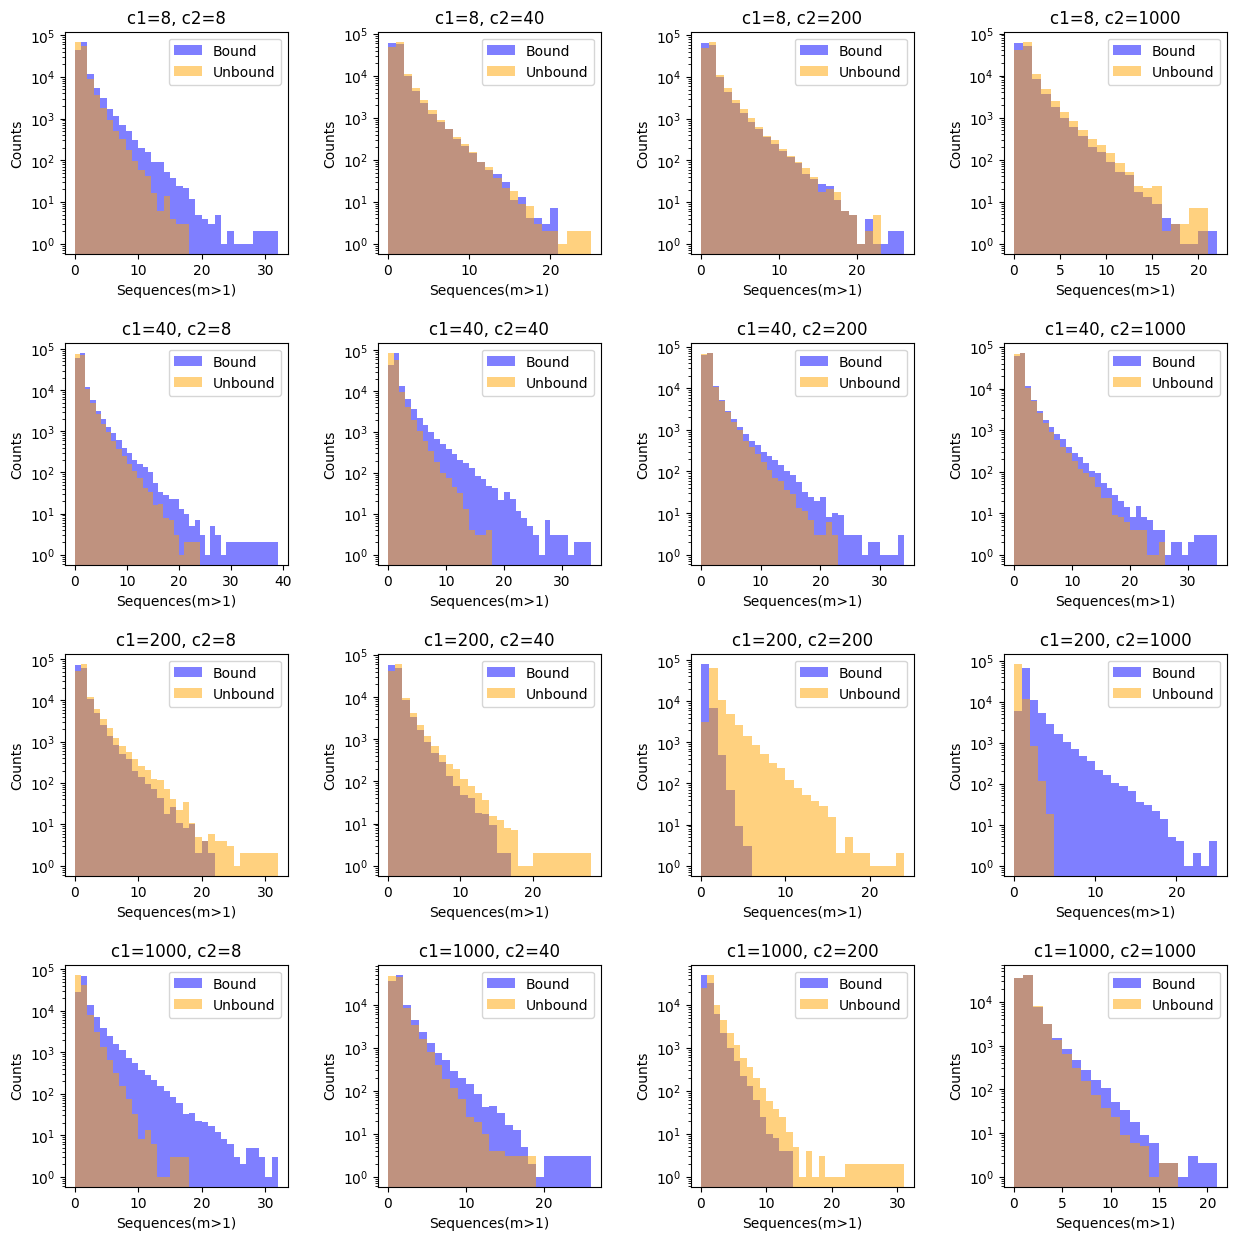

In [15]:
# plot histogram of number of unique sequences with 2 or more mutations
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# loop through all concentrations
for i, c1 in enumerate(protein_concentrations):
    for j, c2 in enumerate(protein_concentrations):
        # plot histogram of bound and unbound counts
        axs[i, j].hist(high_mutant_seqs_bound[(c1,c2)], alpha=0.5, label='Bound', color='blue', bins=np.unique(high_mutant_seqs_bound[(c1,c2)]))
        axs[i, j].hist(high_mutant_seqs_unbound[(c1,c2)], alpha=0.5, label='Unbound', color='orange', bins=np.unique(high_mutant_seqs_unbound[(c1,c2)]))
        axs[i, j].set_title(f'c1={c1}, c2={c2}')
        axs[i, j].set_xlabel('Sequences(m>1)')
        axs[i, j].set_ylabel('Counts')
        # log scale the y-axis
        axs[i, j].set_yscale('log')
        axs[i, j].legend()
plt.show()

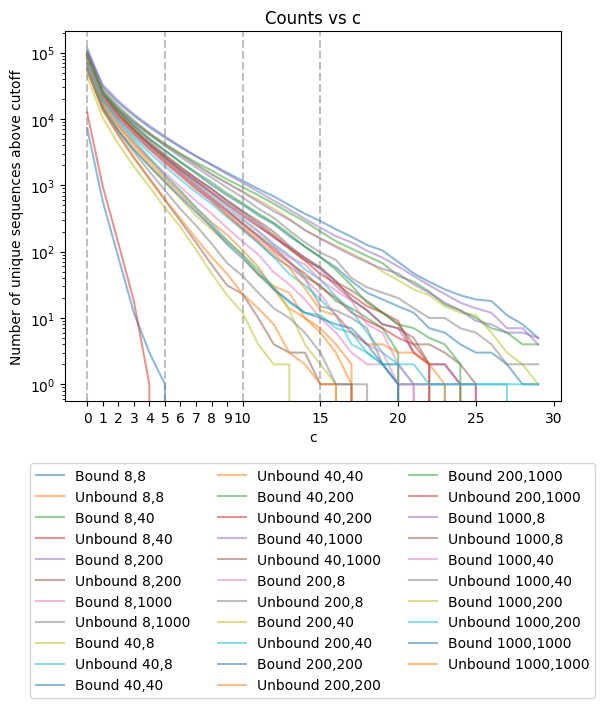

In [22]:
# plot threshold vs number of unique sequences with 2 or more mutations
thresholds = np.arange(0, 30, 1)
high_mutant_seqs_bound_above_threshold = {}
high_mutant_seqs_unbound_above_threshold = {}
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # get the bound and unbound counts
        bound_counts_ = high_mutant_seqs_bound[(c1,c2)]
        unbound_counts_ = high_mutant_seqs_unbound[(c1,c2)]
        # get the number of sequences above the threshold
        high_mutant_seqs_bound_above_threshold[(c1,c2)] = np.array([np.sum(bound_counts_ > t) for t in thresholds])
        high_mutant_seqs_unbound_above_threshold[(c1,c2)] = np.array([np.sum(unbound_counts_ > t) for t in thresholds])
        # plot the number of counts above threshold
        plt.plot(thresholds, high_mutant_seqs_bound_above_threshold[(c1,c2)], label=f'Bound {c1},{c2}', alpha=0.5)
        plt.plot(thresholds, high_mutant_seqs_unbound_above_threshold[(c1,c2)], label=f'Unbound {c1},{c2}', alpha=0.5)
# vertical lines at 10, 20, 50, 100, 200, 500, 1000
for t in [0, 5, 10, 15]:
    plt.axvline(x=t, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('c')
plt.ylabel('Number of unique sequences above cutoff')
plt.title('Counts vs c')
plt.yscale('log')
# set x ticks to be arange(0, 20, 1)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30])
# plot legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

In [23]:
path = '/datadisk/MIME/exp/expData/'

In [24]:
# load encoded wt sequences
encoded_wt = np.loadtxt(path + 'aligned_reads_Wt_encoded.txt', dtype=str)
print(encoded_wt.shape)

(1464898,)


In [25]:
# split characters into columns
encoded_wt = np.array([list(seq) for seq in encoded_wt])
print(encoded_wt.shape)

(1464898, 169)


In [28]:
# count how often '0', '1', '2', '3' appear in each column
counts = np.zeros((encoded_wt.shape[1], 4), dtype=int)
for i in range(encoded_wt.shape[1]):
    counts[i, 0] = np.sum(encoded_wt[:, i] == '0')
    counts[i, 1] = np.sum(encoded_wt[:, i] == '1')
    counts[i, 2] = np.sum(encoded_wt[:, i] == '2')
    counts[i, 3] = np.sum(encoded_wt[:, i] == '3')
print(counts)

[[1464811      33      30      24]
 [1464796      42      28      32]
 [1464827      29      21      21]
 [1464795      40      32      31]
 [1464852      15      12      19]
 [1464777      31      50      40]
 [1464828      27      23      20]
 [1464809      23      24      42]
 [1464831      22      22      23]
 [1464825      30      14      29]
 [1464837      20      24      17]
 [1464862      14       8      14]
 [1464825      29      17      27]
 [1464845      18      15      20]
 [1464844      24      18      12]
 [1464835      19      23      21]
 [1464832      30      14      22]
 [1464784      38      36      40]
 [1464834      22      18      24]
 [1464756      49      54      39]
 [1464794      33      30      41]
 [1464779      43      41      35]
 [1464777      44      42      35]
 [1464818      23      32      25]
 [1464811      29      28      30]
 [1464841      15      20      22]
 [1464830      26      14      28]
 [1464799      43      33      23]
 [1464819      30   

In [30]:
# convert counts to percentages
counts = counts / np.sum(counts, axis=1, keepdims=True)
print(counts)

[[9.99940610e-01 2.25271657e-05 2.04792416e-05 1.63833932e-05]
 [9.99930371e-01 2.86709382e-05 1.91139588e-05 2.18445243e-05]
 [9.99951532e-01 1.97966002e-05 1.43354691e-05 1.43354691e-05]
 [9.99929688e-01 2.73056554e-05 2.18445243e-05 2.11618829e-05]
 [9.99968598e-01 1.02396208e-05 8.19169662e-06 1.29701863e-05]
 [9.99917400e-01 2.11618829e-05 3.41320693e-05 2.73056554e-05]
 [9.99952215e-01 1.84313174e-05 1.57007519e-05 1.36528277e-05]
 [9.99939245e-01 1.57007519e-05 1.63833932e-05 2.86709382e-05]
 [9.99954263e-01 1.50181105e-05 1.50181105e-05 1.57007519e-05]
 [9.99950167e-01 2.04792416e-05 9.55697939e-06 1.97966002e-05]
 [9.99958359e-01 1.36528277e-05 1.63833932e-05 1.16049035e-05]
 [9.99975425e-01 9.55697939e-06 5.46113108e-06 9.55697939e-06]
 [9.99950167e-01 1.97966002e-05 1.16049035e-05 1.84313174e-05]
 [9.99963820e-01 1.22875449e-05 1.02396208e-05 1.36528277e-05]
 [9.99963137e-01 1.63833932e-05 1.22875449e-05 8.19169662e-06]
 [9.99956994e-01 1.29701863e-05 1.57007519e-05 1.433546

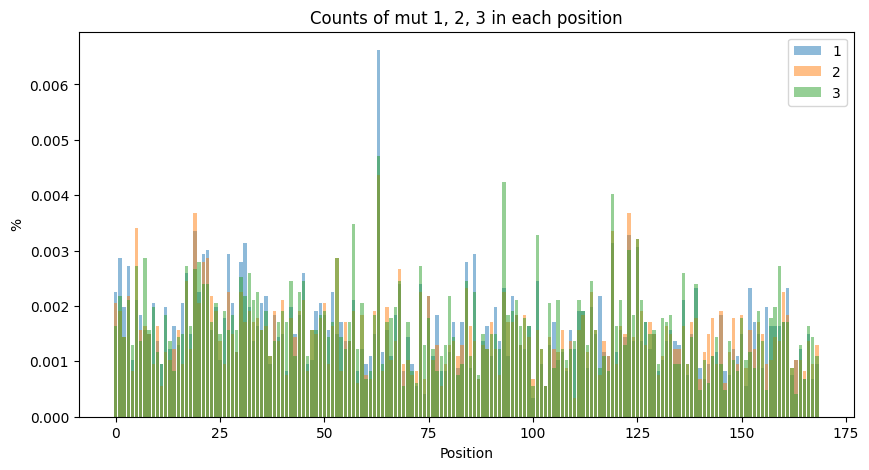

In [33]:
# plot the counts
plt.figure(figsize=(10, 5))
# plt.bar(np.arange(encoded_wt.shape[1]), counts[:, 0], label='0', alpha=0.5)
plt.bar(np.arange(encoded_wt.shape[1]), counts[:, 1]*100, label='1', alpha=0.5)
plt.bar(np.arange(encoded_wt.shape[1]), counts[:, 2]*100, label='2', alpha=0.5)
plt.bar(np.arange(encoded_wt.shape[1]), counts[:, 3]*100, label='3', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('%')
plt.title('Counts of mut 1, 2, 3 in each position')
plt.legend()
plt.show()

In [35]:
# write out the counts to a file
np.savetxt(path + 'encoded_wt_counts.txt', counts, fmt='%f')

In [41]:
mean_error_probs = np.mean(counts[:, 1:], axis=1)
print(mean_error_probs.shape)
print(mean_error_probs)

(169,)
[1.97966002e-05 2.32098071e-05 1.61558461e-05 2.34373542e-05
 1.04671679e-05 2.75332025e-05 1.59282990e-05 2.02516944e-05
 1.52456576e-05 1.66109404e-05 1.38803748e-05 8.19169662e-06
 1.66109404e-05 1.20599978e-05 1.22875449e-05 1.43354691e-05
 1.50181105e-05 2.59403726e-05 1.45630162e-05 3.23116922e-05
 2.36649014e-05 2.70781083e-05 2.75332025e-05 1.82037703e-05
 1.97966002e-05 1.29701863e-05 1.54732047e-05 2.25271657e-05
 1.79762231e-05 1.29701863e-05 2.52577313e-05 2.34373542e-05
 2.16169772e-05 1.72935818e-05 1.88864117e-05 1.72935818e-05
 1.91139588e-05 1.04671679e-05 1.70660346e-05 1.50181105e-05
 1.84313174e-05 1.09222622e-05 2.07067887e-05 1.34252806e-05
 2.00241473e-05 2.38924485e-05 9.55697939e-06 1.38803748e-05
 1.66109404e-05 1.88864117e-05 1.93415059e-05 1.31977334e-05
 1.86588645e-05 2.41199956e-05 1.31977334e-05 1.43354691e-05
 1.47905633e-05 2.50301841e-05 8.87433801e-06 1.70660346e-05
 7.96414949e-06 8.64679088e-06 1.75211289e-05 5.23358395e-05
 9.78452652e-06 1

In [42]:
# write out the mean error probabilities to a file
np.savetxt(path + 'encoded_wt_mean_error_probs.txt', mean_error_probs, fmt='%f')